In [1]:
import numpy as np 
import pandas as pd 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

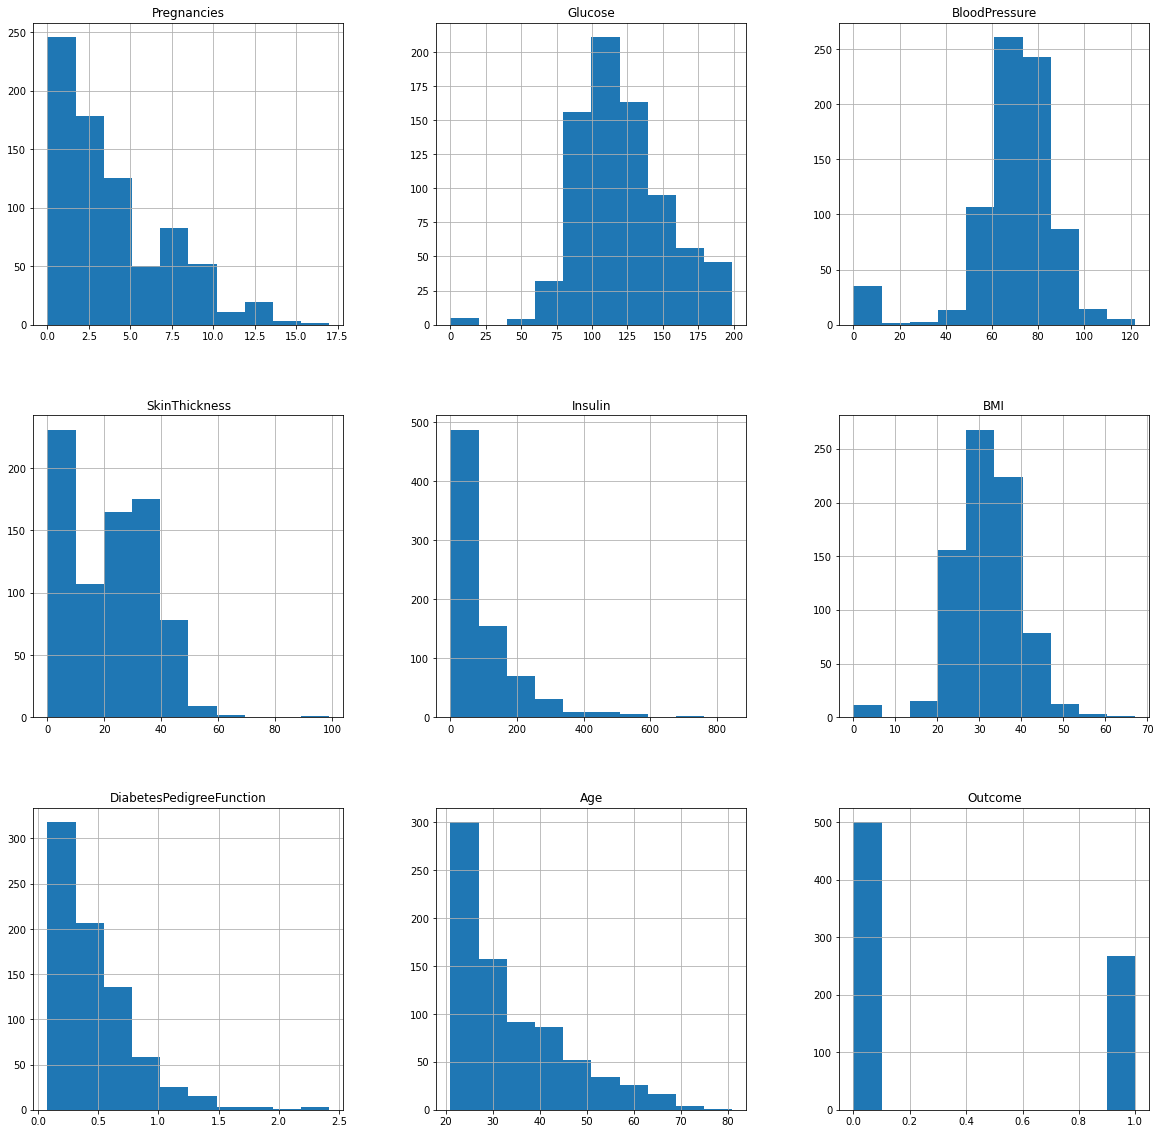

In [5]:
def show_hist(df):
    return df.hist(figsize=(20,20))
show_hist(df)

In [6]:
X_full = pd.read_csv('diabetes.csv')
y = X_full.Outcome
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X=X_full[features].copy()

In [7]:
x_temp,x_test,y_temp,y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2,random_state=0)
x_train,x_valid,y_train,y_valid = train_test_split(x_temp, y_temp, train_size = 0.75, test_size=0.25,random_state=0)


In [8]:
def confusion_matrix(pred,y):
    #true positive, false positive, actual positive, true negative, false negative, actual negative
    TP,FP,AP,TN,FN,AN=0,0,0,0,0,0
    pred=list(pred)
    y=list(y)
    
    for i in range(len(pred)):
        if y[i]==1:
            AP+=1
            if pred[i] == 1:
                TP+=1
            elif pred[i] == 0: 
                FN+=1
        elif y[i]==0:
            AN+=1
            if pred[i] == 1:
                FP+=1
            elif pred[i] == 0: 
                TN+=1
    
 #Recall rate = (true positive value) / (actual positive value)
    recall_rate = TP/AP
    #Specificity rate = (true negative value) / (actual negative value)
    specificity_rate = TN/AN
    #Accuracy rate = (true positive value + true negative value) / (total number of samples)
    accuracy_rate = (TP+TN)/len(y)
    #Misclassification (error) rate = (false positive value + false negative value) / (total number of samples)
    misclassification_rate = (FP+FN)/len(y)
    #Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
    precision = TP/(TP+FP)
    #F1 score is to find the harmonic mean of recall and precision. F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    f1_score = 2*(recall_rate*precision) / (recall_rate+precision)
    
    print("recall_rate is {}, specificity_rate is {}, accuracy_rate is {}, misclassification_rate is {}, f1_score is {}".format(round(recall_rate,2),round(specificity_rate,2),round(accuracy_rate,2),round(misclassification_rate,2), round(f1_score,2)))
    return TP,FP,TN,FN,AP,AN,recall_rate,specificity_rate,accuracy_rate,misclassification_rate,f1_score

# Define a unified function to calculate the errors
def score_dataset(x_train, y_train, x_valid, y_valid, model):
    # Good practice usage scaling techniques:
        # 1.Fit the scaler using available training data.
        # 2.Apply the scale to training data.
        # 3.Apply the scale to data going forward.
    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    model.fit(scaled_x_train, y_train.values.ravel())
    pred = model.predict(scaler.fit_transform(x_valid))
    return confusion_matrix(pred,y_valid)

In [9]:
# A group of models to compare
model1=LogisticRegression(max_iter=1000)
model2=RandomForestClassifier(n_estimators=63, random_state=0)
model3=tree.DecisionTreeClassifier(max_depth = 5, random_state=0)
model4 = SVC(random_state=42, C=1000, gamma=0.001)
model_group = [model1,model2, model3, model4]

In [10]:
score_dataset(x_train, y_train, x_valid, y_valid, model1)

# Result:
# recall_rate is 0.53, specificity_rate is 0.87, accuracy_rate is 0.74, misclassification_rate is 0.26, f1_score is 0.6
# Original performance without cleaning the data

recall_rate is 0.53, specificity_rate is 0.87, accuracy_rate is 0.74, misclassification_rate is 0.26, f1_score is 0.6


(30,
 13,
 84,
 27,
 57,
 97,
 0.5263157894736842,
 0.865979381443299,
 0.7402597402597403,
 0.2597402597402597,
 0.6)

In [11]:
# From Hist observation, following features contains non-helpful zero data: Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age
features_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]

# Try 1st way of cleaning the zero data,
# Drop the zero data
dropped_x_train = x_train.drop(features_with_zero, axis=1)
dropped_x_valid = x_valid.drop(features_with_zero, axis=1)
#printing the score dataset for dropping the zeros
print(score_dataset(dropped_x_train, y_train, dropped_x_valid, y_valid, model1))

# Result:
# recall_rate is 0.23, specificity_rate is 0.92, accuracy_rate is 0.66, misclassification_rate is 0.34, f1_score is 0.33
# (13, 8, 89, 44, 57, 97, 0.22807017543859648, 0.9175257731958762, 0.6623376623376623, 0.33766233766233766)
# Drop the zero data actually makes the pr

recall_rate is 0.23, specificity_rate is 0.92, accuracy_rate is 0.66, misclassification_rate is 0.34, f1_score is 0.33
(13, 8, 89, 44, 57, 97, 0.22807017543859648, 0.9175257731958762, 0.6623376623376623, 0.33766233766233766, 0.3333333333333333)


In [12]:
# Try 2nd way of cleaning the zero data,
# SKLearn model replace the zero data with actual values

replaced_x_train = x_train.copy(deep=True)
replaced_x_valid = x_valid.copy(deep=True)

replaced_x_train[features_with_zero] = x_train[features_with_zero].replace(0,np.NaN)
replaced_x_valid[features_with_zero] = x_valid[features_with_zero].replace(0,np.NaN)

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(replaced_x_train))
imputed_x_valid = pd.DataFrame(my_imputer.fit_transform(replaced_x_valid))

imputed_x_train.columns = x_train.columns
imputed_x_valid.columns = x_valid.columns

print(score_dataset(imputed_x_train, y_train, imputed_x_valid, y_valid, model1))


recall_rate is 0.53, specificity_rate is 0.86, accuracy_rate is 0.73, misclassification_rate is 0.27, f1_score is 0.59
(30, 14, 83, 27, 57, 97, 0.5263157894736842, 0.8556701030927835, 0.7337662337662337, 0.2662337662337662, 0.594059405940594)


In [13]:
# Try 3rd way of cleaning the zero data,
# Manually replace the zero data with actual values 

replaced_x_train = x_train.copy(deep=True)
replaced_x_valid = x_valid.copy(deep=True)

def manual_replace(x):
    x["Glucose"].fillna(x["Glucose"].mean(), inplace = True)
    x['BloodPressure'].fillna(x['BloodPressure'].mean(), inplace = True)
    x['SkinThickness'].fillna(x['SkinThickness'].median(), inplace = True)
    x['Insulin'].fillna(x['Insulin'].median(), inplace = True)
    x['BMI'].fillna(x['BMI'].median(), inplace = True)
    return x

replaced_x_train = manual_replace(replaced_x_train)
replaced_x_valid = manual_replace(replaced_x_valid)

print(score_dataset(replaced_x_train, y_train, replaced_x_valid, y_valid, model1))

recall_rate is 0.53, specificity_rate is 0.87, accuracy_rate is 0.74, misclassification_rate is 0.26, f1_score is 0.6
(30, 13, 84, 27, 57, 97, 0.5263157894736842, 0.865979381443299, 0.7402597402597403, 0.2597402597402597, 0.6)


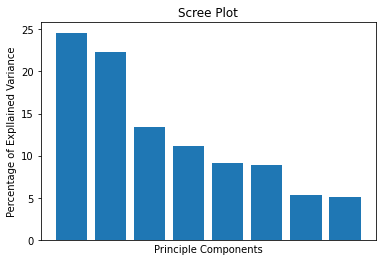

In [14]:
# Try Support Vector Machines
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#     scaler = StandardScaler()
#     scaled_x_train = scaler.fit_transform(x_train)
#     model.fit(scaled_x_train, y_train.values.ravel())

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
pca = PCA()
pca_x_train = pca.fit_transform(scaled_x_train)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Expllained Variance')
plt.xlabel('Principle Components')
plt.title('Scree Plot')
plt.show()

In [15]:
train_pc1_coords = pca_x_train[:,0]
train_pc2_coords = pca_x_train[:,1]

pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C':[1,10,100,1000],
     'gamma':['scale',1,0.1, 0.01, 0.001, 0.0001],
     'kernel':['rbf']
    },
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [16]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
score_dataset(x_train, y_train, x_valid, y_valid, clf_svm)

recall_rate is 0.53, specificity_rate is 0.92, accuracy_rate is 0.77, misclassification_rate is 0.23, f1_score is 0.63


(30,
 8,
 89,
 27,
 57,
 97,
 0.5263157894736842,
 0.9175257731958762,
 0.7727272727272727,
 0.22727272727272727,
 0.631578947368421)

recall_rate is 0.58, specificity_rate is 0.9, accuracy_rate is 0.78, misclassification_rate is 0.22, f1_score is 0.66
recall_rate is 0.61, specificity_rate is 0.9, accuracy_rate is 0.79, misclassification_rate is 0.21, f1_score is 0.69
recall_rate is 0.6, specificity_rate is 0.91, accuracy_rate is 0.79, misclassification_rate is 0.21, f1_score is 0.68
recall_rate is 0.63, specificity_rate is 0.9, accuracy_rate is 0.8, misclassification_rate is 0.2, f1_score is 0.7
recall_rate is 0.61, specificity_rate is 0.91, accuracy_rate is 0.8, misclassification_rate is 0.2, f1_score is 0.69
recall_rate is 0.61, specificity_rate is 0.89, accuracy_rate is 0.79, misclassification_rate is 0.21, f1_score is 0.68
recall_rate is 0.6, specificity_rate is 0.9, accuracy_rate is 0.79, misclassification_rate is 0.21, f1_score is 0.67


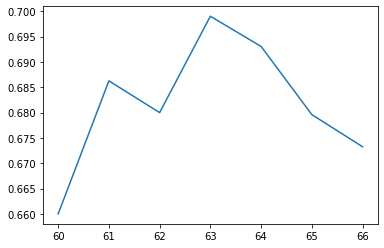

In [17]:
#decide the estimator for the random forest treee
group_estimators = list(range(60,67,1))
results = {}

for estimator in group_estimators:
    model2=RandomForestClassifier(n_estimators=estimator, random_state=0)
    f1_score = score_dataset(x_train, y_train, x_valid, y_valid, model2)[10]
    results[estimator] = f1_score

%matplotlib inline
plt.plot(list(results.keys()), list(results.values()))
plt.show()
# optimized RandomForestClassifier n_estimators 63

recall_rate is 0.53, specificity_rate is 0.89, accuracy_rate is 0.75, misclassification_rate is 0.25, f1_score is 0.61
recall_rate is 0.53, specificity_rate is 0.88, accuracy_rate is 0.75, misclassification_rate is 0.25, f1_score is 0.61
recall_rate is 0.56, specificity_rate is 0.86, accuracy_rate is 0.75, misclassification_rate is 0.25, f1_score is 0.62
recall_rate is 0.49, specificity_rate is 0.82, accuracy_rate is 0.7, misclassification_rate is 0.3, f1_score is 0.55
recall_rate is 0.54, specificity_rate is 0.8, accuracy_rate is 0.71, misclassification_rate is 0.29, f1_score is 0.58
recall_rate is 0.53, specificity_rate is 0.82, accuracy_rate is 0.71, misclassification_rate is 0.29, f1_score is 0.58
recall_rate is 0.63, specificity_rate is 0.7, accuracy_rate is 0.68, misclassification_rate is 0.32, f1_score is 0.59
recall_rate is 0.6, specificity_rate is 0.75, accuracy_rate is 0.69, misclassification_rate is 0.31, f1_score is 0.59
recall_rate is 0.61, specificity_rate is 0.82, accura

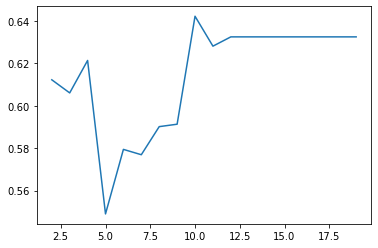

In [18]:
leaf_dep_list = [x for x in range(20) if x >1]

results ={}
for leaf_dep in leaf_dep_list:
  model3=tree.DecisionTreeClassifier(max_depth = leaf_dep, random_state=0)
  f1_score = score_dataset(x_train, y_train,x_valid, y_valid, model3)[10]
  results[leaf_dep]=f1_score

%matplotlib inline
plt.plot(list(results.keys()), list(results.values()))
plt.show()
# optimal max_depth=5

In [19]:
for i in model_group:
    print(i)
    print(score_dataset(x_train, y_train, x_valid, y_valid, i))

LogisticRegression(max_iter=1000)
recall_rate is 0.53, specificity_rate is 0.87, accuracy_rate is 0.74, misclassification_rate is 0.26, f1_score is 0.6
(30, 13, 84, 27, 57, 97, 0.5263157894736842, 0.865979381443299, 0.7402597402597403, 0.2597402597402597, 0.6)
RandomForestClassifier(n_estimators=63, random_state=0)
recall_rate is 0.63, specificity_rate is 0.9, accuracy_rate is 0.8, misclassification_rate is 0.2, f1_score is 0.7
(36, 10, 87, 21, 57, 97, 0.631578947368421, 0.8969072164948454, 0.7987012987012987, 0.2012987012987013, 0.6990291262135923)
DecisionTreeClassifier(max_depth=5, random_state=0)
recall_rate is 0.49, specificity_rate is 0.82, accuracy_rate is 0.7, misclassification_rate is 0.3, f1_score is 0.55
(28, 17, 80, 29, 57, 97, 0.49122807017543857, 0.8247422680412371, 0.7012987012987013, 0.2987012987012987, 0.5490196078431373)
SVC(C=1000, gamma=0.001, random_state=42)
recall_rate is 0.53, specificity_rate is 0.92, accuracy_rate is 0.77, misclassification_rate is 0.23, f1_sc

In [20]:
final_model = RandomForestClassifier(n_estimators=63, random_state=0)
final_model.fit(x_temp, y_temp)
preds_test=final_model.predict(x_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': x_test.index,
                       'Outcome': preds_test})
output.to_csv('submission.csv', index=False)